# Grover Search Algorithm: A Descriptive Overview

The Grover Search algorithm is a quantum computing algorithm that efficiently searches an unsorted database for a specific item. It showcases the remarkable power of quantum parallelism to accelerate certain types of computational tasks. Developed by Lov Grover in 1996, the algorithm can significantly outperform classical methods when searching for a marked item in an unstructured database.

## Components of the Grover Search Algorithm:

## Oracle (Marking Phase)

    The oracle is a key component in the Grover Search algorithm. It marks the target item(s) by inverting their phase. In classical computing, this step would involve evaluating each item in the database to determine if it matches the search criteria. However, the quantum oracle can simultaneously apply this operation to all items, thanks to quantum parallelism. The oracle amplifies the probability amplitude of the marked state.

## Diffusion Operator (Amplitude Amplification Phase)

    The diffusion operator, also known as the Grover Diffuser, amplifies the amplitude of the marked state and reduces the amplitudes of the other states. It performs a reflection about the average amplitude, effectively concentrating the probability amplitude on the marked item(s). This step enhances the chances of measuring the correct solution.

## Grover Iterations

    The algorithm iteratively applies the oracle and the diffusion operator. The optimal number of iterations, denoted by 'k', is approximately √N, where N is the number of items in the database. This is a fundamental aspect of Grover's algorithm that contributes to its speedup over classical search methods.

## Application of the Grover Search Algorithm:

    One common application of the Grover Search algorithm is searching in an unsorted database. Given the quantum nature of the algorithm, it is particularly advantageous when searching for an item among a large number of possibilities. It has potential applications in cryptography, optimization problems, and database searches. For example, it can be used to search for specific values in a large database, solve certain types of cryptographic puzzles more efficiently, or find optimal solutions to complex problems.

## Input and Output:

### Input:
    The algorithm requires the number of qubits used for encoding the items in the database and the target items you want to search for. The quantum oracle is constructed based on the target items.

### Output:
    After the Grover Search algorithm is executed, the result is measured, and you obtain a quantum state that has an increased probability of containing the target item(s). This state is then measured, and the output is a histogram plot showing the counts of the measured states. The states corresponding to the target item(s) will have higher probabilities, indicating a successful search.

---

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
import numpy as np
# Importing standard Qiskit libraries:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.ibmq import least_busy

In [3]:
least_busy

<function qiskit.providers.ibmq.least_busy(backends: List[qiskit.providers.backend.Backend], reservation_lookahead: Optional[int] = 60) -> qiskit.providers.backend.Backend>

---

In [4]:
def phase_oracle(n, indices_to_mark, name='Oracle'):
    """
    Generates a phase oracle to flip the phase of marked elements.
    Transforms the matrix into a corresponding unitary gate.

    Args:
        n (int): Number of qubits.
        indices_to_mark (list): List of integers representing the indices of
                               elements to mark as winners.
        name (str, optional): Name of the QuantumCircuit object (default: 'Oracle').

    Returns:
        QuantumCircuit: A QuantumCircuit object containing the oracle gate.
    """
    qc = QuantumCircuit(n, name=name)  # Initialize a quantum circuit with n qubits.
    oracle_matrix = np.identity(2**n)  # Create an identity matrix of dimension 2^n.

    # Flip the sign of the specified indices.
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1

    # Apply the matrix as a unitary gate to the circuit's qubits.
    qc.unitary(oracle_matrix, range(n))

    return qc


In [5]:
def diffuser(n, name='Diffuser'):
    """
    Prepares a diffuser circuit that amplifies the amplitudes of winning states.

    Args:
        n (int): Number of qubits.
        name (str, optional): Name of the QuantumCircuit object (default: 'Diffuser').

    Returns:
        QuantumCircuit: A QuantumCircuit object representing the diffuser circuit.
    """
    all_nums = list(range(2 ** n))  # [0, ..., (2**n) - 1]
    except_zero = all_nums[1:]  # [1, ..., (2**n) - 1]

    qc = QuantumCircuit(n, name=name)  # Initialize a quantum circuit with n qubits.

    qc.h(range(n))  # Prepare the state |s> = H|0>.
    
    # Generate the diffuser matrix using the phase_oracle function.
    diffuser_matrix = phase_oracle(n, except_zero)
    
    qc.append(diffuser_matrix, range(n))  # Apply the diffuser matrix => V|s>.
    qc.h(range(n))  # Apply the H gate to the circuit => HV|s>.

    return qc


In [6]:
def grover_search(n, marked):
    """
    Prepares the entire circuit for Grover's search algorithm to find marked elements.

    Args:
        n (int): Number of qubits.
        marked (list): List of keys to search for.

    Returns:
        QuantumCircuit: Final Grover's search circuit.
    """
    qc = QuantumCircuit(n, n)  # Initialize a quantum circuit with n qubits and classical bits.
    M = len(marked)  # Number of marked elements.
    N = 2 ** n  # Total number of elements that can be represented with n qubits.
    theta = 2 * np.arcsin(np.sqrt(M / N))  # Calculate the angle of rotation.
    rounds = int(np.ceil(np.pi / (2 * theta)) - (1 / 2))  # Calculate the number of rounds needed.

    # Print information about the algorithm.
    print(f"Number of qubits: {n}")
    print(f"Keys to search: {marked}")
    print(f"Number of rounds needed: {rounds}")

    qc.h(range(n))  # Step 1: Prepare the superposition states of each qubit.

    for _ in range(rounds):  # For all the rounds...
        qc.append(phase_oracle(n, marked), range(n))  # Step 2: Apply the phase oracle.
        qc.append(diffuser(n), range(n))  # Step 3: Apply the diffuser.

    qc.measure(range(n), range(n))  # Final step: Measure the qubits.

    return qc


---

Enter the number of qubits: 
Enter the elements (space-separated): 
Number of qubits: 5
Keys to search: [3, 7]
Number of rounds needed: 3

Grover's Search Circuit Summary:


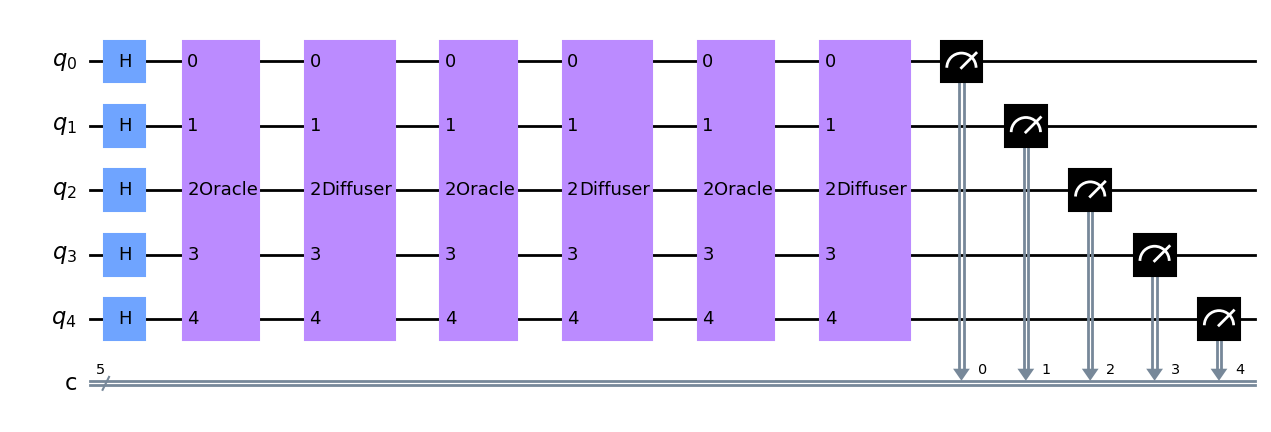

In [7]:
print("Enter the number of qubits: ")
n = 5

print("Enter the elements (space-separated): ")
marked = [3, 7]

qc = grover_search(n, marked)

# Print the Grover's search circuit summary
print("\nGrover's Search Circuit Summary:")
qc.draw()

In [8]:
# Run it in the simulator:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots = 8192).result()
counts = result.get_counts(qc)
counts

{'01010': 9,
 '01111': 11,
 '00001': 7,
 '00110': 14,
 '11110': 9,
 '00100': 13,
 '11000': 12,
 '10000': 8,
 '11111': 10,
 '11011': 16,
 '11010': 14,
 '00101': 11,
 '10001': 12,
 '01001': 12,
 '01110': 14,
 '01011': 14,
 '11101': 11,
 '00011': 3941,
 '00111': 3935,
 '10100': 8,
 '10111': 10,
 '10101': 7,
 '10010': 7,
 '11100': 8,
 '10110': 13,
 '00010': 8,
 '01000': 14,
 '01100': 10,
 '01101': 10,
 '00000': 6,
 '11001': 11,
 '10011': 7}

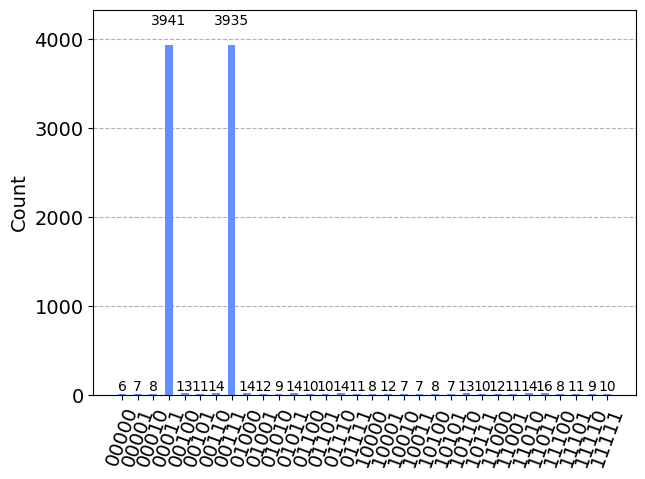

In [9]:
plot_histogram(counts)

---